# Seeking Enlightment 

### Ironhack Final Project, by Anna Riera

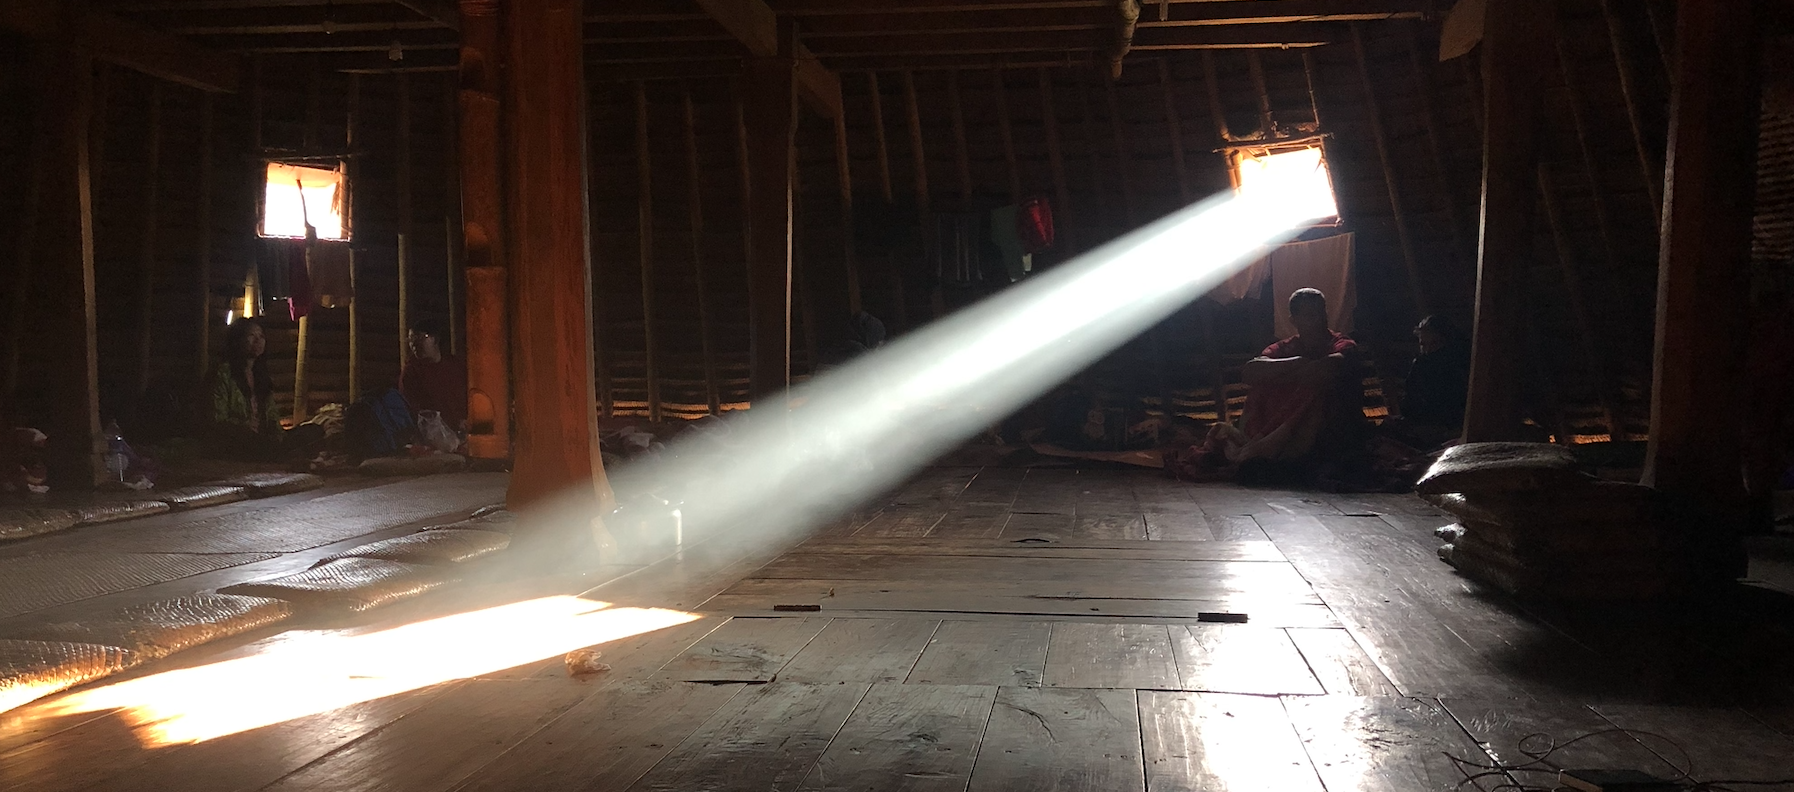

###### Picture taken in my travels in the village of Wae Rebo, Indonesia

## Project Description

When someone starts the process of searching for a flat, multiple criteria needs to be considered: Price, Location, N of Rooms, etc... and online flat portals are great at supporting with the filtering efforts and narrowing our search.

Nonetheless, the search can still be overwhelming and there are still many factors which cannot be included in our search parameters: Flat luminosity is one of them.

## Hypotheses / Questions

Questions I have asked myself prior to the project:

* Is luminosity an important factor for people when looking to rent/buy a flat?
* Could there be a demand for this parameter to be included in Flat Search portals?
* Is there any way we could establish a measurement for luminosity in a flat?
* Does the luminosity of a flat have an impact on the price of a flat? 

My hypotehsis:

* I belive the luminosty and natural light of a flat is a factor many people would care about.
* I believe that a flat with greater luminosity would be priced higher.



## Dataset

Before starting the actual analysis, I wanted to validate the interest for "Luminosity" in a slat. To do so, I ran a survey amongst 58 respondents.


In order to start our analysis, I had to extract a big dataset on flat images. After trying different renamed flat portals in Barcelona : Idealista.com ; Engel&Volkers ; Fotocasa.es I found multple difficulties to access datasets (limited calls, robot blockers, etc...). Eventually I decided to opt for a smaller real estate site, but with enought data to run my analysis.

I explored and scraped the following site : www.eixhabitat.es/

I selected the following parameters : Flats for Sale in Barcelona

The size of my dataset is:

 - 96 individual flats analysed
 - 1080 images analysed
 - 11 - 12 images per flat analysed in average
 - 2688 Objects identified with Object detection in our dataset

## Cleaning

As mentioned above, I had to scrape a smaller real estate website. Doing it was a challenging task given that the JSON structure was all over the place. I had to scrape each individual flat link, and extract flat information as well as all the images of each.

I also focused my efforts on scraping the important images since my code was initially extracting irrelevant imagery: such as logos, company branding and generic images.


## Analysis

I had 3 goals for my analysis : 
1. Understanding the overall interest of the population in "Luminosity" as a parameter
2. If the response was positive, establishing a luminosity score for each individual flat.
3. Replicating and visualising an test site, called lightorflight.com, which reflected my Luminosity Score as a filtering parameter. 



### 1. The survey and it´s results:

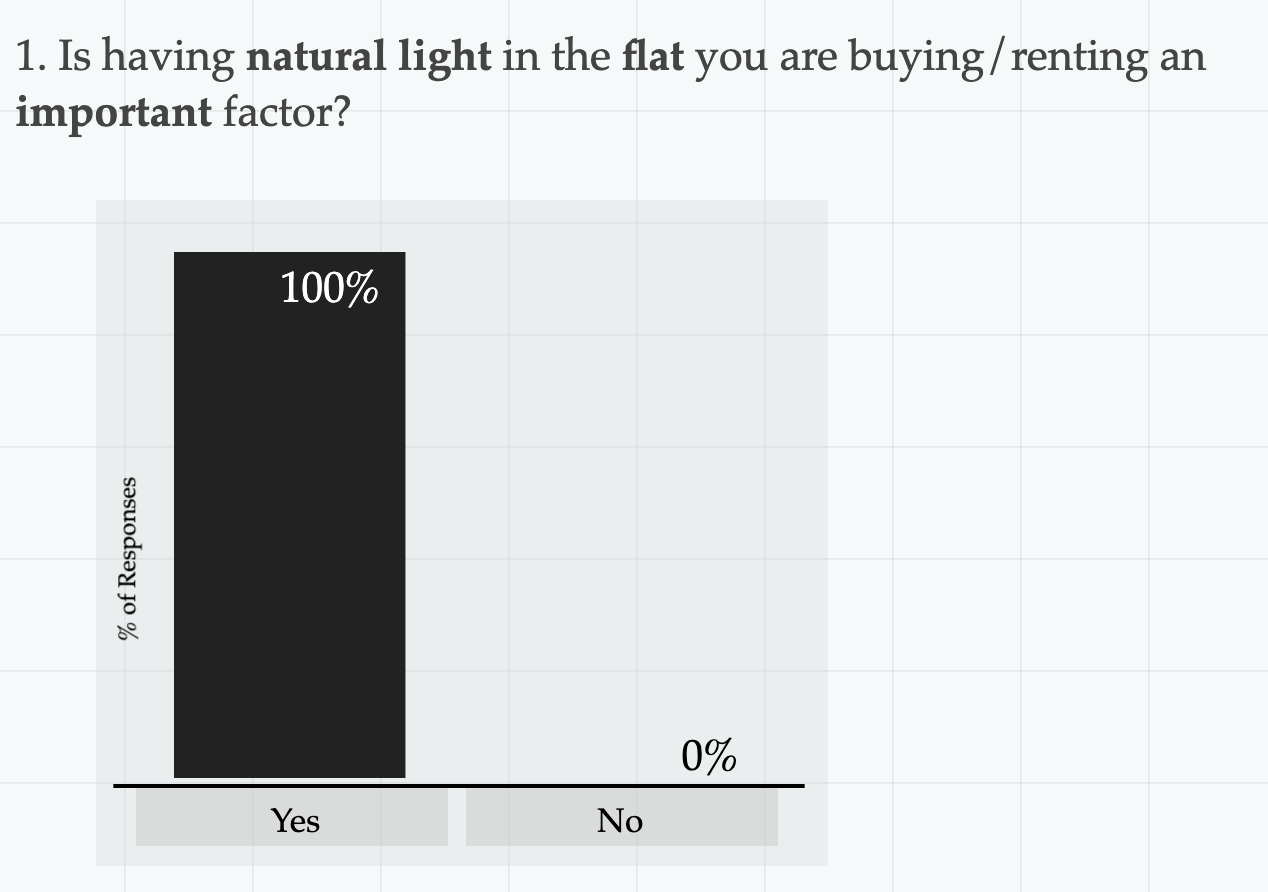

 - 100% of people believe having natural light on a flat (to rent or buy) is an important factor.

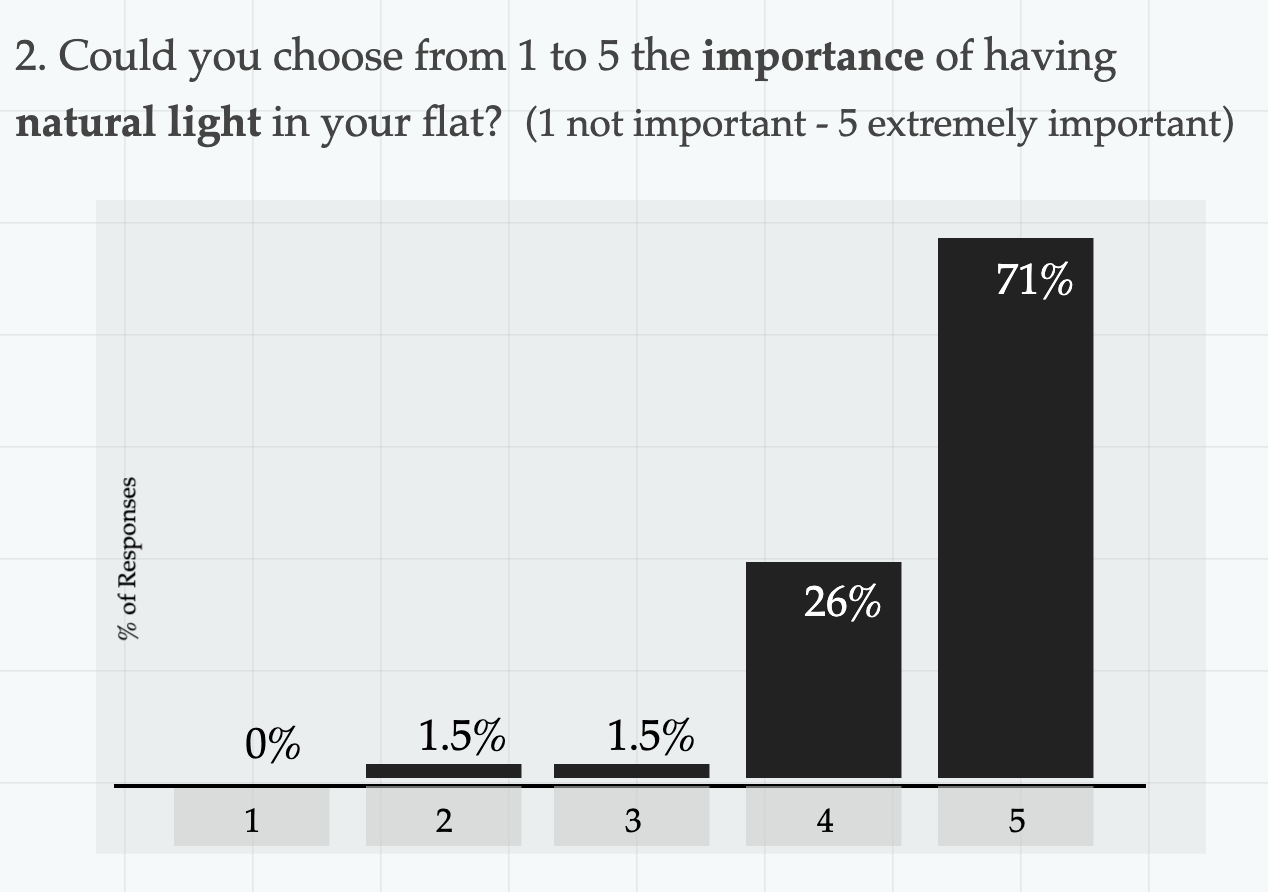

 - When asked to choose from 1 to 5 "the importance of having natural light in your flat", 97% of respondents selected 5 (71%) and 4 (26%).

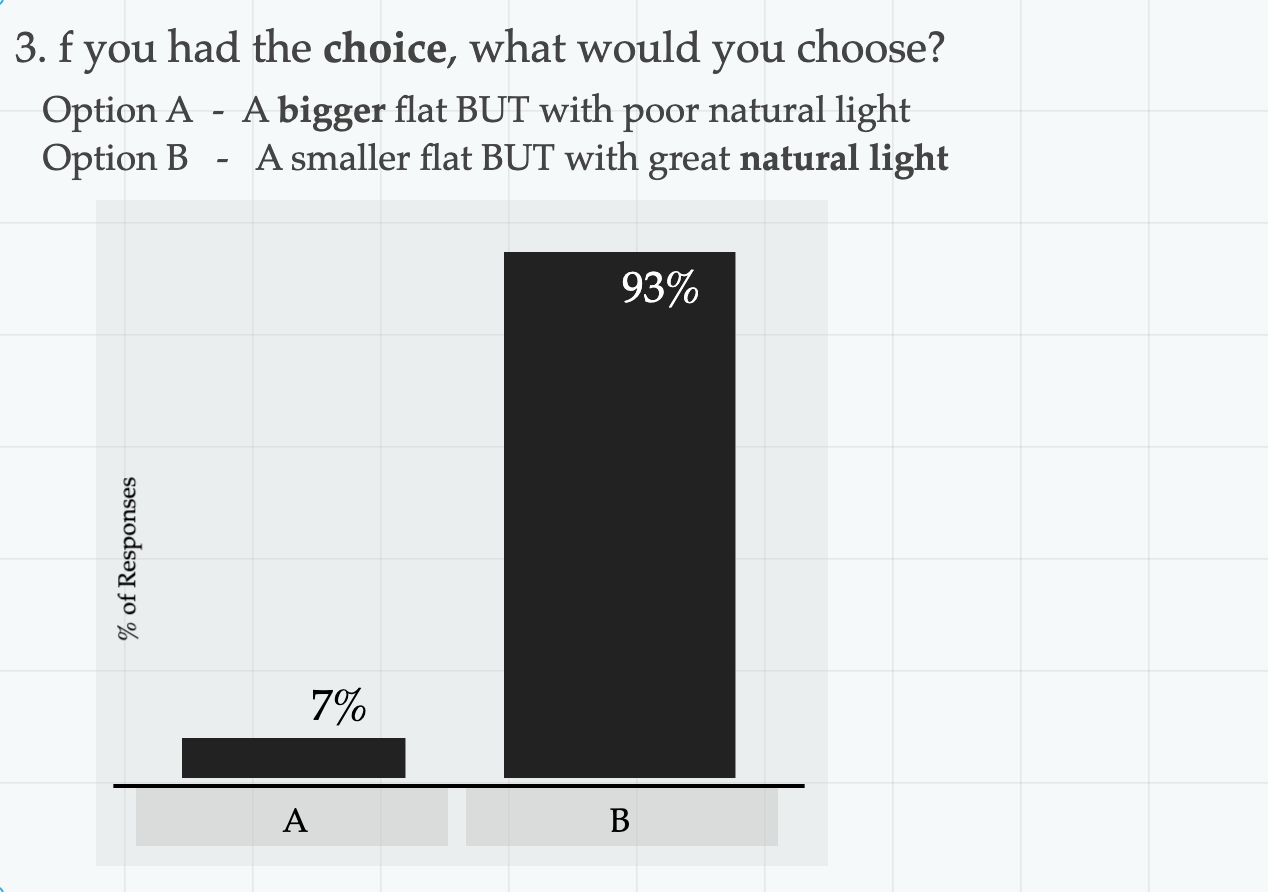

 - When asked if they would rather choose A) A bigger flat BUT with poor natural light OR B) A smaller flat BUT with great natural light, 93% of respondents chose option B.
 
 
Therefore, it is clear that there is an appeal for "luminosity" in flats, but no real estate online agency is offering this paramenter as a classifier. Therefore, i decided to create a Luminosity score myself.

### 2. Establishing a Luminosity Score

To do this, I analysed into different parameters which I then combined in my overall score:

####  2.1. Object recognition : Identifying if the images of a flat had, or not, windows.

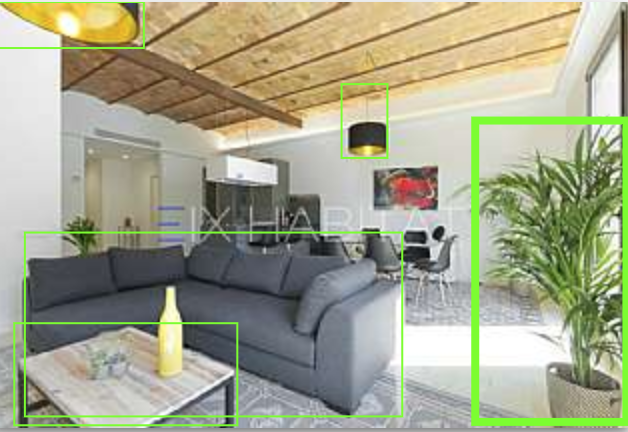

I initially tried to create my own algorythm to identify windows but found a lot of difficulties. For example, I tried looking into the window detection by a square/rectangular shape analysis, but this resulted very challenging given that it would also class object such as doors, wardrobes, drawers inefficiently.

Finally, I managed to connect my imagery to a Google Vision algorythm which gave me a dataframe with all the objects classified as well as the accuracy score per each image.

#### 2.2 Pixel mean analysis: Getting an overall score of the "colour" average of each image.

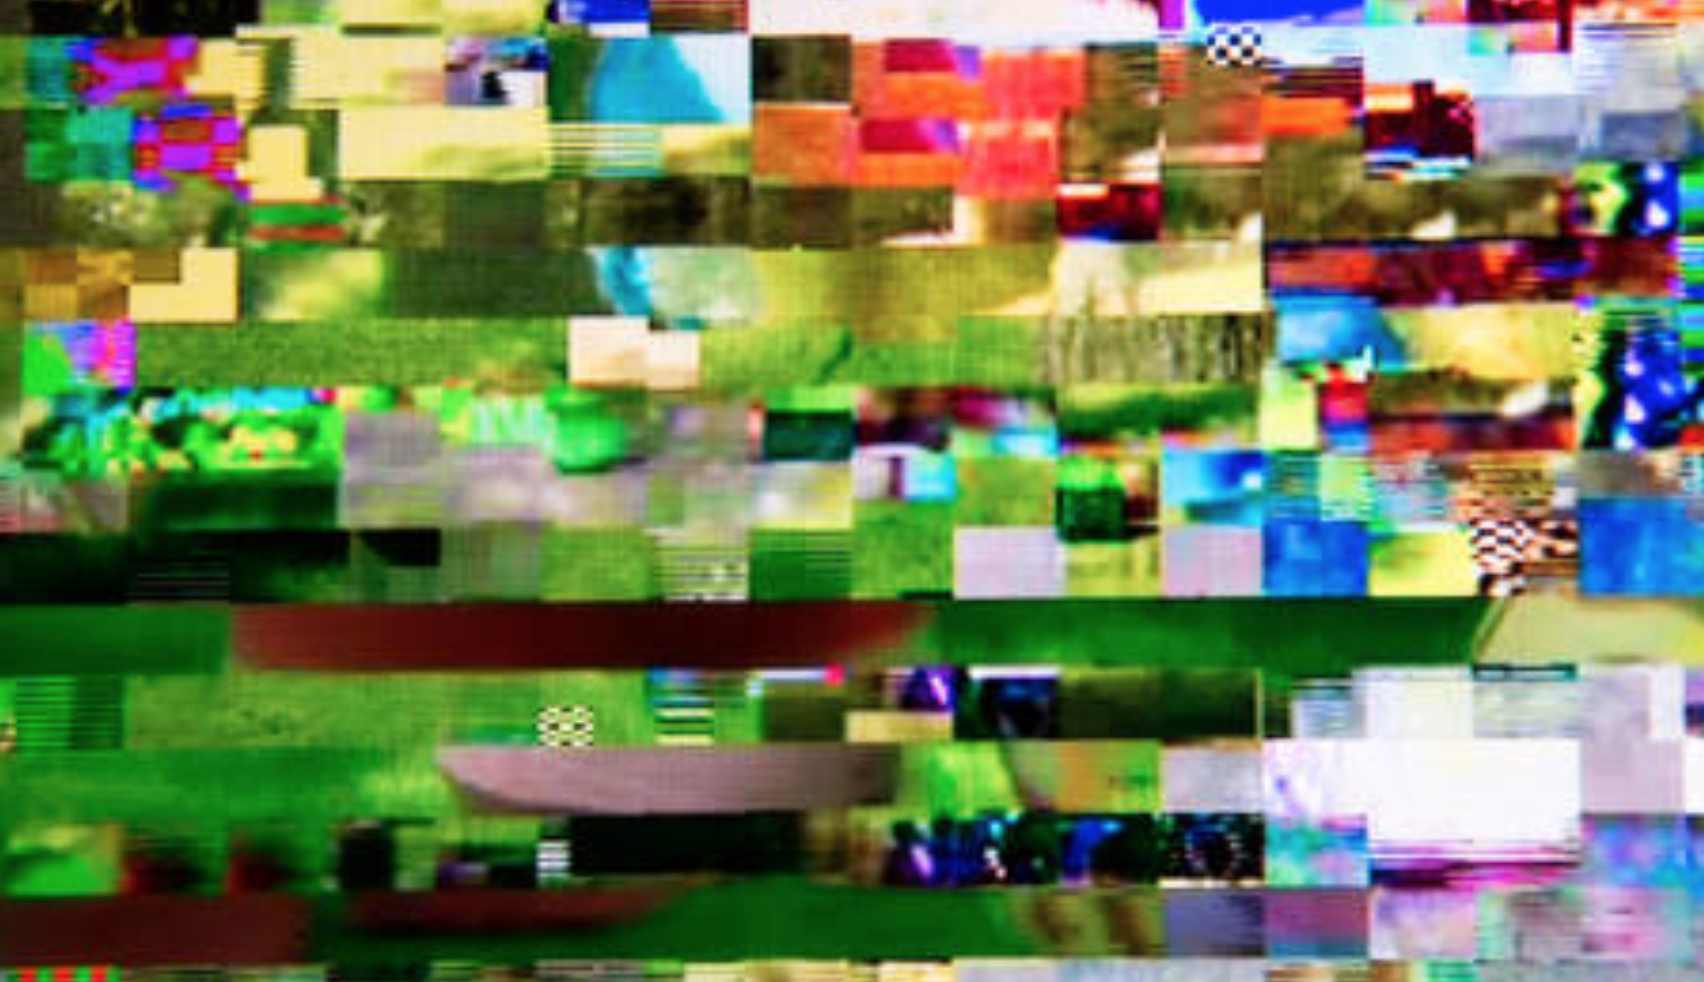

In this analysis, I split the image into individual pixels, getting an array of values for each. I did a mean analysis for this values and established a pixel mean for each image. Since the values ranged from 0(black) to 255 (white), I normalised the values to be able to get a comparable metric to all the parameters.



#### 2.3 % of Brightness: Getting the % distribution of the brightness of an image.

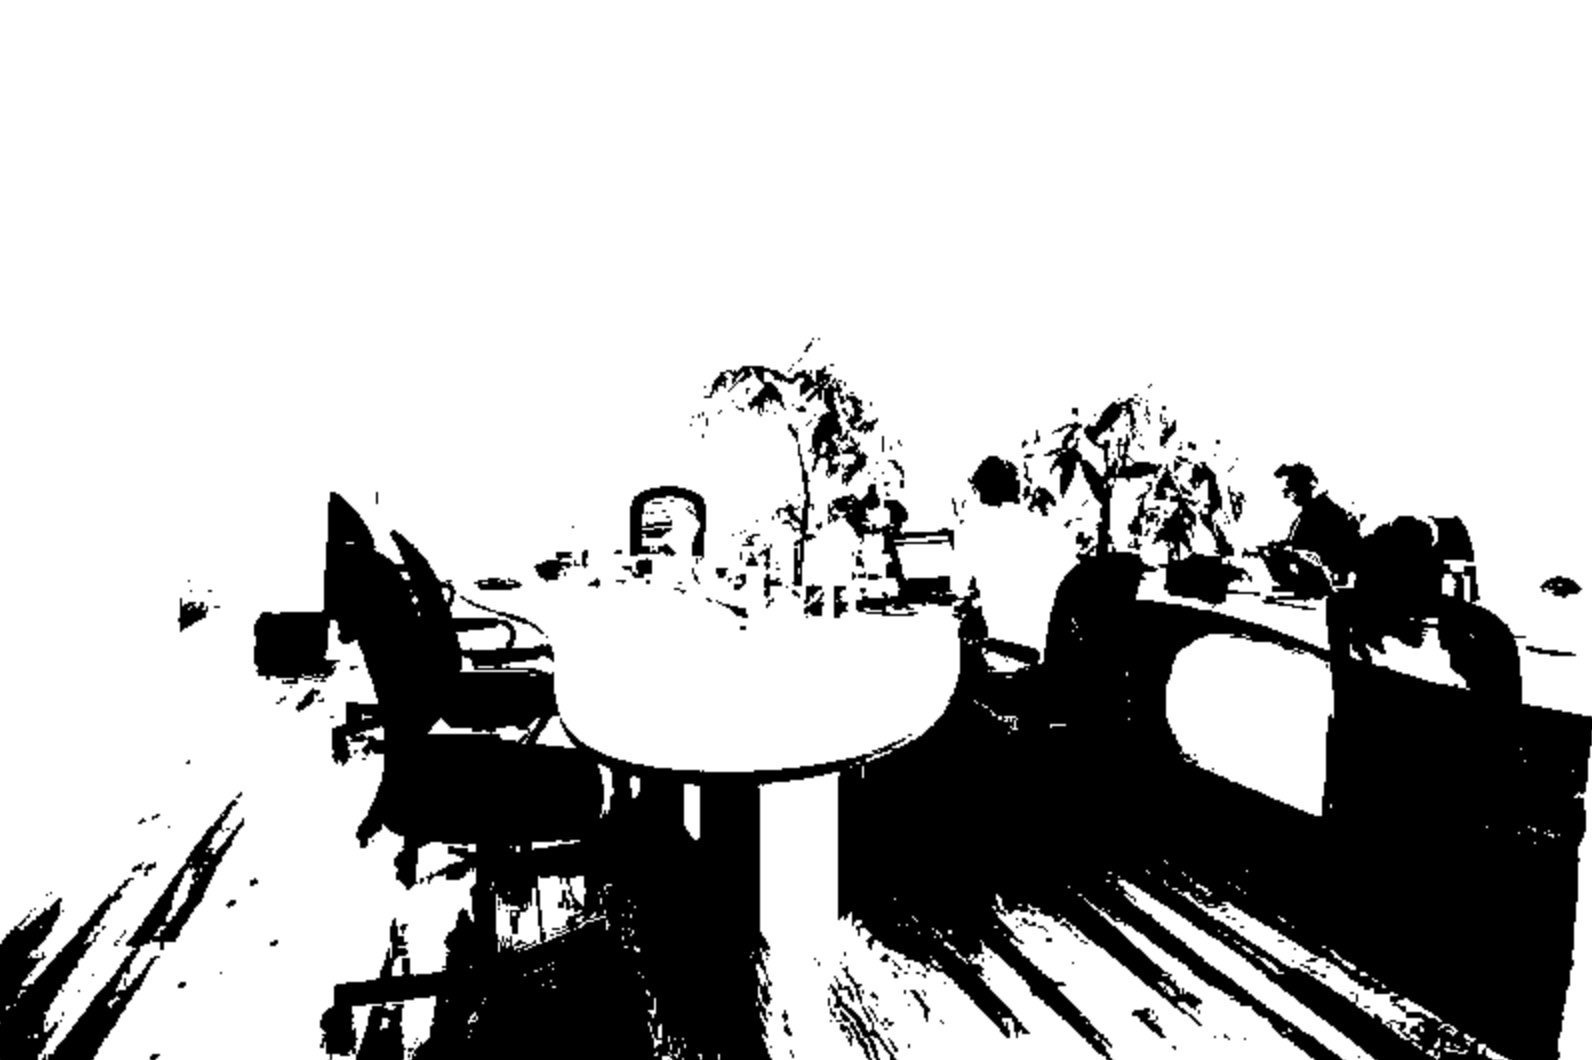

In this analysis, I also split the image into individual pixels but this time each pixel was classed (based on the colour) as a "white/bright" pixel or a "black/dark". This allowed me to get a % of brightness in each individual image. This value was also normalised.


Finally, considering the 3 parameters analysed, I created an overall Luminosity score per image. I then took this one level up, and managed to get an overall luminosity score for each individual flat.

### 3. lightorflight.com

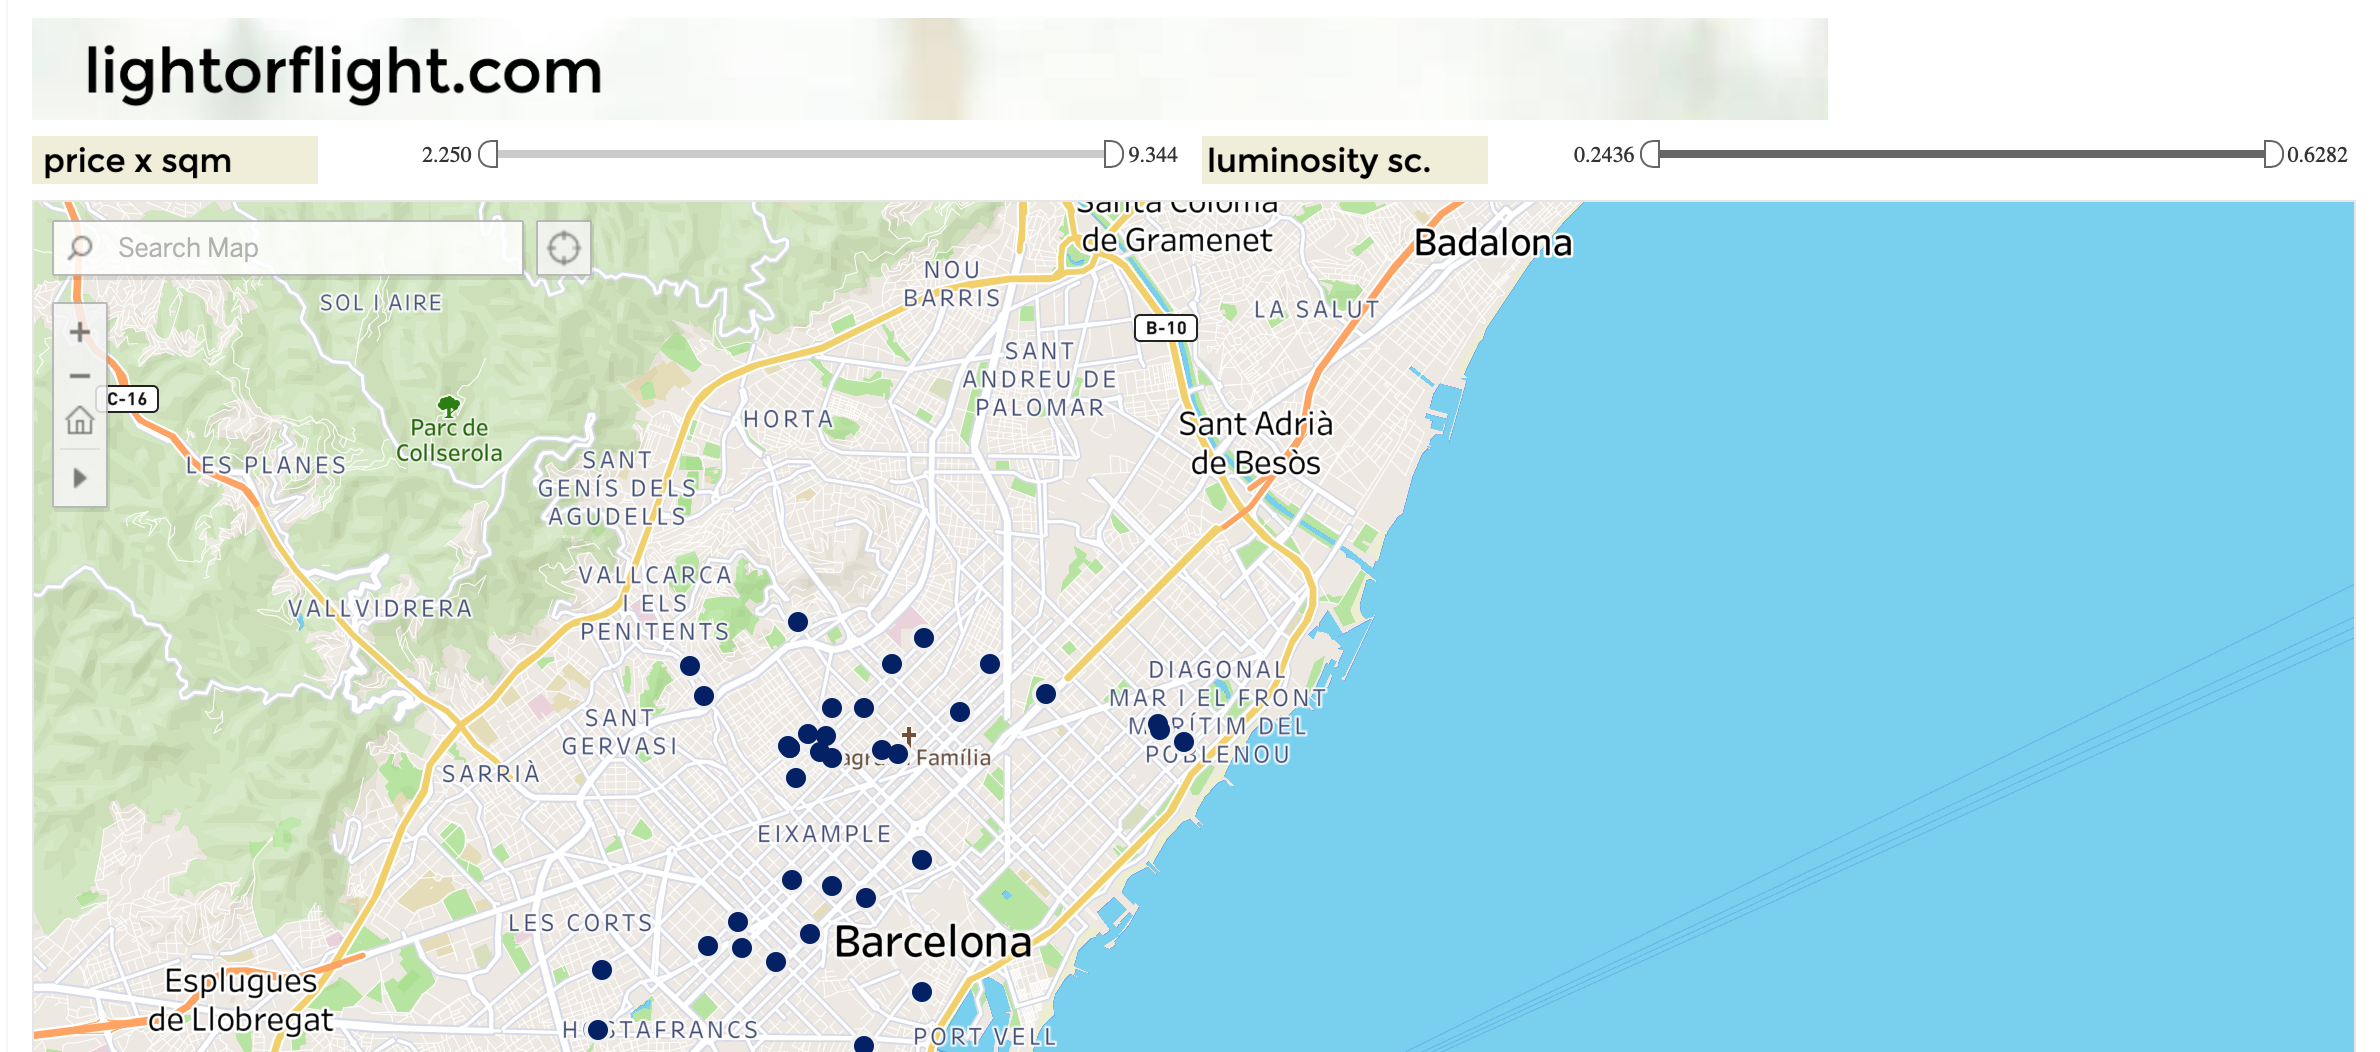

Finally, I created a dummy version of a potential site including the new Luminosity Score as a paramenter. Once you establish the filters, a map get filtered with all individual flats complying your criters. From each flat, you can get it´s individual information, showcasing the Luminosity score as well as the other 3 sub paramenters. It also has an interactive link which takes you to the real site and the relevant information. 
Please test and play of the following link: 

https://public.tableau.com/shared/GZW6NBJPM?:display_count=y&:origin=viz_share_link

## Conclusion

There is a clear interest amongst the population in this type of parameter.

Having looked at the luminosity score achieved and revising the actual flat imagery, I can positively say the score was useful at classifying flats which were more luminous versus those that were not.


## Future Work

Eventually, given the scraping limitations I found, I was not able to scrape a massive dataset for analysis. If done in the future, I would like to expand my analysis by understanding the relationship between luminosity scoring and flat prices. Could we see any pattern between higher luminosity scores and bigger price uplifts per sqm? Something to look out for in the future.

## Workflow

- Finding a topic of interest to me
- Exploring what was available on the market in terms of similar concepts
- Generating a survey to gauge people´s interest
- Establishing the framework to establish the Luminosity Score
- Finding a relevant site for imagery analysis
- Scraping the real estate site
- Undertaking the analysis
- Finding the results
- Creating a visualization to mirror a new potential real estate site introducing the new score

## Organization

My repository includes:
- Code folder: Different codes I have trialed and tested for the project
- Datasets folder: The imagery extracted from the relevant site
- Final code foler: A version of the latest copy of my code including all documentation
- Presentation folder : Content used in my final presentation

# ---------------------------------------------------------------------------------------#

# NOW LET´S CHECK THE CODE

### SCRAPING & DATA CLEANING

In [62]:
# import libraries

from bs4 import BeautifulSoup
import requests
import re
import cv2

In [39]:
# Let´s identify all the main links within the site, with apartments for Sale in Barcelona

source1 = requests.get('https://www.eixhabitat.es/inmuebles/listainmuebles.asp?lang=E&emp=6388&cod_pais=1&cod_prov=1&cod_pob=1930008&cod_zona=-2&tip_inm=1&tip_op=V&pvp_min=-1&pvp_max=-1&m2_min=0&m2_max=99999999&hab_min=0&hab_max=25').text
source2 = requests.get('https://www.eixhabitat.es/inmuebles/listaInmuebles.asp?lang=E&emp=6388&cod_pais=1&cod_prov=1&cod_pob=1930008&tip_inm=1&tip_inm2=-2&tip_op=V&cod_zona=-2&pvp_min=-1&pvp_max=-1&m2_min=0&m2_max=99999999&hab_max=25&hab_min=0&referencia=&ref_emp=&pag=1').text
source3 = requests.get('https://www.eixhabitat.es/inmuebles/listaInmuebles.asp?lang=E&emp=6388&cod_pais=1&cod_prov=1&cod_pob=1930008&tip_inm=1&tip_inm2=-2&tip_op=V&cod_zona=-2&pvp_min=-1&pvp_max=-1&m2_min=0&m2_max=99999999&hab_max=25&hab_min=0&referencia=&ref_emp=&pag=2').text
source4 = requests.get('https://www.eixhabitat.es/inmuebles/listaInmuebles.asp?lang=E&emp=6388&cod_pais=1&cod_prov=1&cod_pob=1930008&tip_inm=1&tip_inm2=-2&tip_op=V&cod_zona=-2&pvp_min=-1&pvp_max=-1&m2_min=0&m2_max=99999999&hab_max=25&hab_min=0&referencia=&ref_emp=&pag=3').text

list_of_pages = [source1, source2, source3, source4]
list_of_links = []


for i in list_of_pages:
    page_links = re.findall('<div class="item" onclick="javascript:document.location.href=(.+?);">', i)
    list_of_links.append(page_links)
    
clean_links = [l[1:-1] for i in list_of_links for l in i]

clean_links[0]

'https://www.eixhabitat.es/f-E-6388-3609836'

In [40]:
print(len(clean_links))

40


In [41]:
clean_links

['https://www.eixhabitat.es/f-E-6388-3609836',
 'https://www.eixhabitat.es/f-E-6388-3679462',
 'https://www.eixhabitat.es/f-E-6388-3635168',
 'https://www.eixhabitat.es/f-E-6388-3661467',
 'https://www.eixhabitat.es/f-E-6388-3661722',
 'https://www.eixhabitat.es/f-E-6388-3691358',
 'https://www.eixhabitat.es/f-E-6388-3621191',
 'https://www.eixhabitat.es/f-E-6388-3621260',
 'https://www.eixhabitat.es/f-E-6388-3693771',
 'https://www.eixhabitat.es/f-E-6388-3661653',
 'https://www.eixhabitat.es/f-E-6388-3639056',
 'https://www.eixhabitat.es/f-E-6388-3661523',
 'https://www.eixhabitat.es/f-E-6388-3620842',
 'https://www.eixhabitat.es/f-E-6388-3609902',
 'https://www.eixhabitat.es/f-E-6388-3674163',
 'https://www.eixhabitat.es/f-E-6388-3678419',
 'https://www.eixhabitat.es/f-E-6388-3691321',
 'https://www.eixhabitat.es/f-E-6388-3661692',
 'https://www.eixhabitat.es/f-E-6388-3637716',
 'https://www.eixhabitat.es/f-E-6388-3659578',
 'https://www.eixhabitat.es/f-E-6388-3671999',
 'https://www

In [276]:
import requests

list_of_dict = []

for i in clean_links:
    page = requests.get(i)
    soup = str(BeautifulSoup(page.content, 'html.parser'))
    dictionary = {}
    dictionary["url"] = i
    text1 = re.findall('pvp_eur_m2">(.+?) € /', soup)
    if text1 == []:
        dictionary["price_per_sqm"] = np.nan
    else:
        dictionary["price_per_sqm"] = float(text1[0])
     
    text2 = re.findall('VGPSLat=(.+?)&', soup)
    if text2 == []:
        dictionary["latitude"] = np.nan
    else:
        dictionary["latitude"] = float(text2[0])
    
    text3 = re.findall('VGPSLon=(.+?)&', soup)
    if text3 == []:
        dictionary["longitude"] = np.nan
    else:
        dictionary["longitude"] = float(text3[0])
        
    list_of_dict.append(dictionary)

In [277]:
temp_df = pd.DataFrame(list_of_dict)
temp_df.head()

url  price_per_sqm   latitude  \
0  https://www.eixhabitat.es/f-E-6388-3609836            NaN        NaN   
1  https://www.eixhabitat.es/f-E-6388-3679462          3.171  41.374167   
2  https://www.eixhabitat.es/f-E-6388-3635168          2.250  41.375680   
3  https://www.eixhabitat.es/f-E-6388-3661467          5.500  41.404840   
4  https://www.eixhabitat.es/f-E-6388-3661722          4.462  41.381516   

   longitude  
0        NaN  
1   2.168704  
2   2.135038  
3   2.206045  
4   2.135554

In [297]:
temp_df['flat_id'] = temp_df['url'].apply(lambda x: x[-7:])

In [298]:
temp_df

url  price_per_sqm   latitude  \
0   https://www.eixhabitat.es/f-E-6388-3609836            NaN        NaN   
1   https://www.eixhabitat.es/f-E-6388-3679462          3.171  41.374167   
2   https://www.eixhabitat.es/f-E-6388-3635168          2.250  41.375680   
3   https://www.eixhabitat.es/f-E-6388-3661467          5.500  41.404840   
4   https://www.eixhabitat.es/f-E-6388-3661722          4.462  41.381516   
..                                         ...            ...        ...   
83  https://www.eixhabitat.es/f-E-6388-3621260          6.385  41.402483   
84  https://www.eixhabitat.es/f-E-6388-3693771          4.048  41.412841   
85  https://www.eixhabitat.es/f-E-6388-3661653          4.120  41.383477   
86  https://www.eixhabitat.es/f-E-6388-3639056          4.622  41.383755   
87  https://www.eixhabitat.es/f-E-6388-3661523          5.391  41.382252   

    longitude  flat_id  
0         NaN  3609836  
1    2.168704  3679462  
2    2.135038  3635168  
3    2.206045  3661467  
4    2.135554  3661722  
..        ...      ...  
83   2.159372  3621260  
84   2.176405  3693771  
85   2.153332  3661653  
86   2.148974  3639056  
87   2.157697  3661523  

[88 rows x 5 columns]

In [226]:
import requests

URL = 'https://www.eixhabitat.es/f-E-6388-3677881'
page = requests.get(URL)

soup = str(BeautifulSoup(page.content, 'html.parser'))
x = float(re.findall('pvp_eur_m2">(.+?) € /', soup)[0])
y = float(re.findall('VGPSLat=(.+?)&', soup)[0])
z = float(re.findall('VGPSLon=(.+?)&', soup)[0])

print(x, y, z)

6.354 41.389988989 2.1595564981


In [ ]:
class="pvp_eur_m2">6.354 € /
VGPSLat=41.389988989&amp
VGPSLon=2.1595564981&amp

In [44]:
for i in list_of_pages:
    page_links = re.findall('<div class="item" onclick="javascript:document.location.href=(.+?);">', source1)
    list_of_links.append(page_links)
    
clean_links = [l[1:-1] for i in list_of_links for l in i]

clean_links[0]

'https://www.eixhabitat.es/f-E-6388-3609836'

In [45]:
print(len(clean_links))

88


In [46]:
list_of_images = []

for i in clean_links:
    link = requests.get(i).text
    soup = BeautifulSoup(link,'lxml')
    text = soup.findAll('img')
    list_of_classes = []

    for i in text:
        list_of_classes.append(str(i))

    for i in list_of_classes:
        link = re.findall('src="(.+?)"', i)[0]
        if link.startswith('https:') & link.endswith('.jpg'):
            list_of_images.append(link)

In [47]:
list_of_images_cleaned = [i for i in list_of_images if 'HAB_LOGOS' not in i]

len(list_of_images_cleaned)

1083

In [116]:
list_of_images_cleaned_unique = list(set(list_of_images_cleaned))

### In Search for Luminosity Score. 3 STEP Approach

### STEP 1. Object Identification - using Google Vision technology

In [128]:
# The below code extracts and saves an image for each individual link image naming
# it with the flat id refrence as well as the img id

# Import requests, shutil python module.
import requests
import shutil

# This is the list of the image url's.
image_url = list_of_images_cleaned_unique
images_for_analysis =[]

j = 0
# Open the url image, set stream to True, this will return the stream content.
for i in list_of_images_cleaned_unique:
    resp = requests.get(i, stream=True)
    
    # Open a local file with wb ( write binary ) permission.
    pattern = r'img[0-9]+-[0-9]*'
    local_file = open(f'local_image_{re.findall(pattern,i)}.jpg', 'wb')
    images_for_analysis.append(f'local_image_{re.findall(pattern,i)}.jpg')
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    resp.raw.decode_content = True
    # Copy the response stream raw data to local image file.
    shutil.copyfileobj(resp.raw, local_file)
    # Remove the image url response object.
    del resp
    j += 1

In [131]:
# Importing relevant libraries for Object Recognition
import io, os
from numpy import random
from google.cloud import vision
import pandas as pd
from google.cloud.vision import types

In [138]:
# Connecting with the Google Vision API for Object Identification

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "RELEVANTJSONINFORMATION"
client = vision.ImageAnnotatorClient()

df = pd.DataFrame(columns=['file_name','name', 'score'])

for i in images_for_analysis:
    image_path = os.path.join(f'/Users/anna/Desktop/Ironhack/Week_9/final_project/code/flat_images_2/{i}')
    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)
    response = client.object_localization(image=image)
    localized_object = response.localized_object_annotations

    # runs the first test
    
    dummy_dict = {}
    for loop in range(len(localized_object)):
        df = df.append(
        dict(
            file_name=i,
            name=localized_object[loop].name,
            score=localized_object[loop].score
        ),
        ignore_index=True)

In [139]:
# First DF with each individual flat image with all objects classified in it and the accuracy score
df

file_name            name     score
0     local_image_['img3686610-6171784'].jpg        Building  0.675572
1     local_image_['img3686610-6171784'].jpg        Building  0.631744
2     local_image_['img3678419-6157934'].jpg            Door  0.659018
3     local_image_['img3685454-6170037'].jpg   Picture frame  0.750355
4     local_image_['img3677881-6157020'].jpg      Television  0.935630
...                                      ...             ...       ...
1438  local_image_['img3677881-6156991'].jpg          Window  0.511259
1439  local_image_['img3667532-6140357'].jpg       Cabinetry  0.799434
1440  local_image_['img3667532-6140357'].jpg  Microwave oven  0.739837
1441  local_image_['img3678419-6157937'].jpg            Door  0.609383
1442  local_image_['img3685454-6170030'].jpg            Door  0.928250

[1443 rows x 3 columns]

In [140]:
# A filtered version of the above DataFrame, bt focusing on the objects we are interested in: Windows
window_df = df[df.name == 'Window']

window_df

file_name    name     score
7     local_image_['img3674163-6151120'].jpg  Window  0.880269
25    local_image_['img3661653-6130820'].jpg  Window  0.760090
32    local_image_['img3660086-6129118'].jpg  Window  0.527955
41    local_image_['img3685454-6170025'].jpg  Window  0.703736
44    local_image_['img3685454-6170025'].jpg  Window  0.560040
...                                      ...     ...       ...
1381  local_image_['img3661467-6130590'].jpg  Window  0.516531
1391  local_image_['img3677881-6156981'].jpg  Window  0.856674
1398  local_image_['img3635168-6134028'].jpg  Window  0.798396
1429  local_image_['img3661692-6130933'].jpg  Window  0.904347
1438  local_image_['img3677881-6156991'].jpg  Window  0.511259

[143 rows x 3 columns]

In [141]:
# Let´s add a 1 in the window_df, for a comparable parameter to other numbers

window_df['Window_True'] = 1

<ipython-input-141-7464d3381c4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_df['Window_True'] = 1


In [142]:
window_df

file_name    name     score  Window_True
7     local_image_['img3674163-6151120'].jpg  Window  0.880269            1
25    local_image_['img3661653-6130820'].jpg  Window  0.760090            1
32    local_image_['img3660086-6129118'].jpg  Window  0.527955            1
41    local_image_['img3685454-6170025'].jpg  Window  0.703736            1
44    local_image_['img3685454-6170025'].jpg  Window  0.560040            1
...                                      ...     ...       ...          ...
1381  local_image_['img3661467-6130590'].jpg  Window  0.516531            1
1391  local_image_['img3677881-6156981'].jpg  Window  0.856674            1
1398  local_image_['img3635168-6134028'].jpg  Window  0.798396            1
1429  local_image_['img3661692-6130933'].jpg  Window  0.904347            1
1438  local_image_['img3677881-6156991'].jpg  Window  0.511259            1

[143 rows x 4 columns]

###  STEP 2. Define a luminosity measurement per overall image

In [144]:
df_pixel_mean = pd.DataFrame(columns=['file_name','pixel_mean','normalized_pixel_mean'])

for i in images_for_analysis:
    img = cv2.imread(f'/Users/anna/Desktop/Ironhack/Week_9/final_project/code/flat_images_2/{i}')
    df_pixel_mean = df_pixel_mean.append(
        dict(
            file_name=i,
            pixel_mean = img.mean(),
            normalized_pixel_mean = img.mean()/255
        ),
        ignore_index=True)
    

In [145]:
df_pixel_mean

file_name  pixel_mean  normalized_pixel_mean
0    local_image_['img3686610-6171784'].jpg  132.306719               0.518850
1    local_image_['img3678419-6157934'].jpg  148.208324               0.581209
2    local_image_['img3685454-6170037'].jpg  191.790713               0.752120
3    local_image_['img3677881-6157020'].jpg   94.989757               0.372509
4    local_image_['img3674163-6151120'].jpg  182.415041               0.715353
..                                      ...         ...                    ...
538  local_image_['img3621275-6072307'].jpg  151.971432               0.595966
539  local_image_['img3677881-6156991'].jpg  116.405208               0.456491
540  local_image_['img3667532-6140357'].jpg  146.727416               0.575402
541  local_image_['img3678419-6157937'].jpg  161.837253               0.634656
542  local_image_['img3685454-6170030'].jpg  155.712934               0.610639

[543 rows x 3 columns]

### STEP 3. Define what % of Image % Classed as Light vs. Dark

In [146]:
import pandas as pd

In [147]:
import cv2
import numpy as np


def bright_or_not(img_name):
    # returns the fraction of bright pixels
    nr_pixels_white = 0
    
    img = cv2.imread(img_name)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    retval, threshold1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
    cv2.imshow('title',threshold1)

    # set 255 to 1
    threshold1[threshold1==255] = 1
    nr_pixels_white = threshold1.sum()
    nr_pixels    = threshold1.shape[0]*threshold1.shape[1]

    brightness = nr_pixels_white / nr_pixels

    #print(img_name+' Brightness = ' + str(brightness))
    
    #cv2.waitKey()
    return brightness

In [150]:
list_of_dictionaries = []

for i in images_for_analysis:
    dictionary = {}
    dictionary['file_name'] = i
    dictionary['light_proportion'] = bright_or_not(i)
    list_of_dictionaries.append(dictionary)

In [151]:
brightness_df = pd.DataFrame(list_of_dictionaries)

brightness_df

file_name  light_proportion
0    local_image_['img3686610-6171784'].jpg          0.491563
1    local_image_['img3678419-6157934'].jpg          0.314935
2    local_image_['img3685454-6170037'].jpg          0.750425
3    local_image_['img3677881-6157020'].jpg          0.106263
4    local_image_['img3674163-6151120'].jpg          0.753623
..                                      ...               ...
538  local_image_['img3621275-6072307'].jpg          0.378242
539  local_image_['img3677881-6156991'].jpg          0.048003
540  local_image_['img3667532-6140357'].jpg          0.468075
541  local_image_['img3678419-6157937'].jpg          0.518177
542  local_image_['img3685454-6170030'].jpg          0.465187

[543 rows x 2 columns]

### Let´s now combine our 3 measurements on "image luminosity" and include all in one single dataframe

In [183]:
full_image_df_v1 = df_pixel_mean.merge(brightness_df, left_on='file_name', right_on='file_name')

In [184]:
full_image_df_v1

file_name  pixel_mean  \
0    local_image_['img3686610-6171784'].jpg  132.306719   
1    local_image_['img3678419-6157934'].jpg  148.208324   
2    local_image_['img3685454-6170037'].jpg  191.790713   
3    local_image_['img3677881-6157020'].jpg   94.989757   
4    local_image_['img3674163-6151120'].jpg  182.415041   
..                                      ...         ...   
538  local_image_['img3621275-6072307'].jpg  151.971432   
539  local_image_['img3677881-6156991'].jpg  116.405208   
540  local_image_['img3667532-6140357'].jpg  146.727416   
541  local_image_['img3678419-6157937'].jpg  161.837253   
542  local_image_['img3685454-6170030'].jpg  155.712934   

     normalized_pixel_mean  light_proportion  
0                 0.518850          0.491563  
1                 0.581209          0.314935  
2                 0.752120          0.750425  
3                 0.372509          0.106263  
4                 0.715353          0.753623  
..                     ...               ...  
538               0.595966          0.378242  
539               0.456491          0.048003  
540               0.575402          0.468075  
541               0.634656          0.518177  
542               0.610639          0.465187  

[543 rows x 4 columns]

In [185]:
# Let's now combine the full_image_df_v1 with the window_df to have a complete dataframe all image paramenters

full_image_df = pd.merge(left=full_image_df_v1, right=window_df, how='left', left_on='file_name', right_on='file_name')

In [186]:
full_image_df

file_name  pixel_mean  \
0    local_image_['img3686610-6171784'].jpg  132.306719   
1    local_image_['img3678419-6157934'].jpg  148.208324   
2    local_image_['img3685454-6170037'].jpg  191.790713   
3    local_image_['img3677881-6157020'].jpg   94.989757   
4    local_image_['img3674163-6151120'].jpg  182.415041   
..                                      ...         ...   
576  local_image_['img3621275-6072307'].jpg  151.971432   
577  local_image_['img3677881-6156991'].jpg  116.405208   
578  local_image_['img3667532-6140357'].jpg  146.727416   
579  local_image_['img3678419-6157937'].jpg  161.837253   
580  local_image_['img3685454-6170030'].jpg  155.712934   

     normalized_pixel_mean  light_proportion    name     score  Window_True  
0                 0.518850          0.491563     NaN       NaN          NaN  
1                 0.581209          0.314935     NaN       NaN          NaN  
2                 0.752120          0.750425     NaN       NaN          NaN  
3                 0.372509          0.106263     NaN       NaN          NaN  
4                 0.715353          0.753623  Window  0.880269          1.0  
..                     ...               ...     ...       ...          ...  
576               0.595966          0.378242     NaN       NaN          NaN  
577               0.456491          0.048003  Window  0.511259          1.0  
578               0.575402          0.468075     NaN       NaN          NaN  
579               0.634656          0.518177     NaN       NaN          NaN  
580               0.610639          0.465187     NaN       NaN          NaN  

[581 rows x 7 columns]

In [187]:
# Let´s see how many images are classified as not having a window

no_windows=full_image_df['name'].isna().sum() 

no_windows

438

In [192]:
# What is the proprtion of images without a window

print((round(no_windows/full_image_df.shape[0],2)),' of the images analysed do not have windows.')

0.75  of the images analysed do not have windows.


In [188]:
full_image_df['Window_True'] = full_image_df['Window_True'].fillna(0)

In [189]:
full_image_df

file_name  pixel_mean  \
0    local_image_['img3686610-6171784'].jpg  132.306719   
1    local_image_['img3678419-6157934'].jpg  148.208324   
2    local_image_['img3685454-6170037'].jpg  191.790713   
3    local_image_['img3677881-6157020'].jpg   94.989757   
4    local_image_['img3674163-6151120'].jpg  182.415041   
..                                      ...         ...   
576  local_image_['img3621275-6072307'].jpg  151.971432   
577  local_image_['img3677881-6156991'].jpg  116.405208   
578  local_image_['img3667532-6140357'].jpg  146.727416   
579  local_image_['img3678419-6157937'].jpg  161.837253   
580  local_image_['img3685454-6170030'].jpg  155.712934   

     normalized_pixel_mean  light_proportion    name     score  Window_True  
0                 0.518850          0.491563     NaN       NaN          0.0  
1                 0.581209          0.314935     NaN       NaN          0.0  
2                 0.752120          0.750425     NaN       NaN          0.0  
3                 0.372509          0.106263     NaN       NaN          0.0  
4                 0.715353          0.753623  Window  0.880269          1.0  
..                     ...               ...     ...       ...          ...  
576               0.595966          0.378242     NaN       NaN          0.0  
577               0.456491          0.048003  Window  0.511259          1.0  
578               0.575402          0.468075     NaN       NaN          0.0  
579               0.634656          0.518177     NaN       NaN          0.0  
580               0.610639          0.465187     NaN       NaN          0.0  

[581 rows x 7 columns]

In [200]:
full_image_df.dtypes

file_name                 object
pixel_mean               float64
normalized_pixel_mean    float64
light_proportion         float64
name                      object
score                    float64
Window_True              float64
dtype: object

In [1]:
# Define what are the relevant values for the analysis and create an aggregate measure for the 3 values

key_measures_per_image = full_image_df[['file_name','normalized_pixel_mean','light_proportion','Window_True']]

NameError: name 'full_image_df' is not defined

In [201]:
key_measures_per_image

file_name  normalized_pixel_mean  \
0    local_image_['img3686610-6171784'].jpg               0.518850   
1    local_image_['img3678419-6157934'].jpg               0.581209   
2    local_image_['img3685454-6170037'].jpg               0.752120   
3    local_image_['img3677881-6157020'].jpg               0.372509   
4    local_image_['img3674163-6151120'].jpg               0.715353   
..                                      ...                    ...   
576  local_image_['img3621275-6072307'].jpg               0.595966   
577  local_image_['img3677881-6156991'].jpg               0.456491   
578  local_image_['img3667532-6140357'].jpg               0.575402   
579  local_image_['img3678419-6157937'].jpg               0.634656   
580  local_image_['img3685454-6170030'].jpg               0.610639   

     light_proportion  Window_True     score  \
0            0.491563          0.0       NaN   
1            0.314935          0.0       NaN   
2            0.750425          0.0       NaN   
3            0.106263          0.0       NaN   
4            0.753623          1.0  0.880269   
..                ...          ...       ...   
576          0.378242          0.0       NaN   
577          0.048003          1.0  0.511259   
578          0.468075          0.0       NaN   
579          0.518177          0.0       NaN   
580          0.465187          0.0       NaN   

                                     luminosity_score  
0    normalized_pixel_meanlight_proportionWindow_True  
1    normalized_pixel_meanlight_proportionWindow_True  
2    normalized_pixel_meanlight_proportionWindow_True  
3    normalized_pixel_meanlight_proportionWindow_True  
4    normalized_pixel_meanlight_proportionWindow_True  
..                                                ...  
576  normalized_pixel_meanlight_proportionWindow_True  
577  normalized_pixel_meanlight_proportionWindow_True  
578  normalized_pixel_meanlight_proportionWindow_True  
579  normalized_pixel_meanlight_proportionWindow_True  
580  normalized_pixel_meanlight_proportionWindow_True  

[581 rows x 6 columns]

In [205]:
key_measures_per_image["luminosity_score"] = (key_measures_per_image['normalized_pixel_mean']+key_measures_per_image['light_proportion']+key_measures_per_image['Window_True'])/3

<ipython-input-205-7e8fe54f4e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_measures_per_image["luminosity_score"] = (key_measures_per_image['normalized_pixel_mean']+key_measures_per_image['light_proportion']+key_measures_per_image['Window_True'])/3


In [206]:
key_measures_per_image

file_name  normalized_pixel_mean  \
0    local_image_['img3686610-6171784'].jpg               0.518850   
1    local_image_['img3678419-6157934'].jpg               0.581209   
2    local_image_['img3685454-6170037'].jpg               0.752120   
3    local_image_['img3677881-6157020'].jpg               0.372509   
4    local_image_['img3674163-6151120'].jpg               0.715353   
..                                      ...                    ...   
576  local_image_['img3621275-6072307'].jpg               0.595966   
577  local_image_['img3677881-6156991'].jpg               0.456491   
578  local_image_['img3667532-6140357'].jpg               0.575402   
579  local_image_['img3678419-6157937'].jpg               0.634656   
580  local_image_['img3685454-6170030'].jpg               0.610639   

     light_proportion  Window_True     score  luminosity_score  
0            0.491563          0.0       NaN          0.336804  
1            0.314935          0.0       NaN          0.298715  
2            0.750425          0.0       NaN          0.500849  
3            0.106263          0.0       NaN          0.159591  
4            0.753623          1.0  0.880269          0.822992  
..                ...          ...       ...               ...  
576          0.378242          0.0       NaN          0.324736  
577          0.048003          1.0  0.511259          0.501498  
578          0.468075          0.0       NaN          0.347826  
579          0.518177          0.0       NaN          0.384278  
580          0.465187          0.0       NaN          0.358609  

[581 rows x 6 columns]

In [288]:
key_measures_per_image['flat_id'] = key_measures_per_image['file_name'].apply(lambda x: x[17:24])

In [289]:
key_measures_per_image

file_name  normalized_pixel_mean  \
0    local_image_['img3686610-6171784'].jpg               0.518850   
1    local_image_['img3678419-6157934'].jpg               0.581209   
2    local_image_['img3685454-6170037'].jpg               0.752120   
3    local_image_['img3677881-6157020'].jpg               0.372509   
4    local_image_['img3674163-6151120'].jpg               0.715353   
..                                      ...                    ...   
576  local_image_['img3621275-6072307'].jpg               0.595966   
577  local_image_['img3677881-6156991'].jpg               0.456491   
578  local_image_['img3667532-6140357'].jpg               0.575402   
579  local_image_['img3678419-6157937'].jpg               0.634656   
580  local_image_['img3685454-6170030'].jpg               0.610639   

     light_proportion  Window_True     score  luminosity_score  flat_id  
0            0.491563          0.0       NaN          0.336804  3686610  
1            0.314935          0.0       NaN          0.298715  3678419  
2            0.750425          0.0       NaN          0.500849  3685454  
3            0.106263          0.0       NaN          0.159591  3677881  
4            0.753623          1.0  0.880269          0.822992  3674163  
..                ...          ...       ...               ...      ...  
576          0.378242          0.0       NaN          0.324736  3621275  
577          0.048003          1.0  0.511259          0.501498  3677881  
578          0.468075          0.0       NaN          0.347826  3667532  
579          0.518177          0.0       NaN          0.384278  3678419  
580          0.465187          0.0       NaN          0.358609  3685454  

[581 rows x 7 columns]

In [290]:
key_measures_per_flat = key_measures_per_image.groupby(['flat_id']).mean()

In [292]:
# This is the final table which gives us a flat luminosity scoring by flat

key_measures_per_flat

normalized_pixel_mean  light_proportion  Window_True     score  \
flat_id                                                                   
3538203               0.580062          0.444734     0.095238  0.614306   
3609836               0.583528          0.485210     0.000000       NaN   
3609902               0.526143          0.233099     0.000000       NaN   
3620842               0.809370          0.867168     0.125000  0.761683   
3621191               0.521659          0.271857     0.083333  0.671557   
3621212               0.633996          0.508944     0.206897  0.822262   
3621248               0.556664          0.220848     0.000000       NaN   
3621260               0.536316          0.271728     0.285714  0.793966   
3621275               0.540318          0.298947     0.000000       NaN   
3635168               0.486362          0.271600     0.125000  0.832494   
3635454               0.537227          0.347321     1.000000  0.645484   
3637700               0.893143          0.856320     0.000000       NaN   
3637716               0.575851          0.303574     0.000000       NaN   
3637886               0.568281          0.417040     0.173913  0.641964   
3638149               0.546717          0.407000     0.375000  0.778042   
3638974               0.542354          0.236215     0.000000       NaN   
3639047               0.595279          0.570021     0.000000       NaN   
3639056               0.435718          0.193273     0.555556  0.804746   
3639066               0.509176          0.344777     0.000000       NaN   
3659578               0.657105          0.555910     0.227273  0.721247   
3660086               0.698148          0.642592     0.185185  0.769961   
3661467               0.562995          0.377483     0.655172  0.698449   
3661523               0.809370          0.867168     0.125000  0.761683   
3661653               0.587999          0.416774     0.117647  0.729435   
3661692               0.602878          0.414525     0.115385  0.887289   
3661722               0.453941          0.276745     0.000000       NaN   
3667532               0.662290          0.572808     0.172414  0.671435   
3671999               0.583506          0.467214     0.263158  0.625731   
3672308               0.661368          0.586502     0.318182  0.714093   
3674163               0.681154          0.601717     0.370370  0.842945   
3676909               0.476453          0.196487     0.583333  0.813424   
3677881               0.424396          0.129514     0.360000  0.761438   
3678419               0.572148          0.335092     0.090909  0.798214   
3679462               0.577170          0.430884     0.076923  0.510362   
3685454               0.691490          0.661564     0.225000  0.566519   
3686610               0.488277          0.253294     0.142857  0.742463   
3691321               0.578879          0.313262     0.000000       NaN   
3691358               0.578879          0.313262     0.000000       NaN   
3693771               0.411231          0.223981     0.318182  0.674144   
3695018               0.560616          0.359025     0.000000       NaN   

         luminosity_score  
flat_id                    
3538203          0.373345  
3609836          0.356246  
3609902          0.253081  
3620842          0.600513  
3621191          0.292283  
3621212          0.449946  
3621248          0.259171  
3621260          0.364586  
3621275          0.279755  
3635168          0.294321  
3635454          0.628183  
3637700          0.583155  
3637716          0.293142  
3637886          0.386411  
3638149          0.442906  
3638974          0.259523  
3639047          0.388433  
3639056          0.394849  
3639066          0.284651  
3659578          0.480096  
3660086          0.508642  
3661467          0.531884  
3661523          0.600513  
3661653          0.374140  
3661692          0.377596  
3661722          0.243562  
3667532          0.469171  
3671999          0.437959  
3672308          0

In [310]:
(key_measures_per_flat.corr())

normalized_pixel_mean  light_proportion  Window_True  \
normalized_pixel_mean               1.000000          0.939411    -0.191827   
light_proportion                    0.939411          1.000000    -0.106906   
Window_True                        -0.191827         -0.106906     1.000000   
score                              -0.029930         -0.105565     0.030833   
luminosity_score                    0.705914          0.776913     0.534908   

                          score  luminosity_score  
normalized_pixel_mean -0.029930          0.705914  
light_proportion      -0.105565          0.776913  
Window_True            0.030833          0.534908  
score                  1.000000         -0.054851  
luminosity_score      -0.054851          1.000000

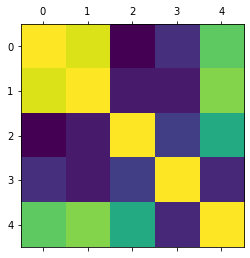

In [309]:
import matplotlib.pyplot as plt

plt.matshow(key_measures_per_flat.corr())
plt.show()

### Let´s Export our 2 main Data Frames for Viz

In [307]:
temp_df.to_csv('flat_data.csv', sep=';')

In [308]:
key_measures_per_flat.to_csv('key_measures_per_flat.csv', sep=';')

### I can now plot the relevant data on an interactive Tableau Dashboard, to visualize lightorflight.com

tableau link : https://public.tableau.com/shared/GZW6NBJPM?:display_count=y&:origin=viz_share_link)

## THE END - Thank You!